# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: **60**</p>
## <p style="text-align: center;">Due: Monday, **Sep 27** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 


**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Kaushik Kumaran

EID: kk34537

Name: Vishal Gupta

EID: vg22846

# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:
a) The term $$E[g(x_0)]-f(x_0)$$ is the difference between the expected value of the fitted function, g(x) and the actual data generating function f(x). This difference is the bias of the estimator.

b) Bias refers to the systematic difference between underlying function and the fitted model. In real life we don't know what is the underlying function hence assume it to be something (linear or non-linear). Variance is the difference between actual and predicted values obtained from the model for a given dataset. 
If we use a very simple model lets say linear regression for a given dataset, then the model parameters don't change much hence variance is low, but since we assumed a simpler model there can be a systematic difference between the underlying function and the fitted model hence high bias.
On the other hand if a very complex model is used, its more likely that we can approximate the underlying function very well therefore low bias. But everytime the model class is trained, the model parameters can very significantly and the predictions for test data hence high variance. 
If we reduce bias we can possibly increase variance and vice-versa, hence the bias variance tradeoff.


# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:


In [1]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-5,5,101).reshape(-1,1)

lrp = LinearRegression()

### Part a

In [2]:
import pandas as pd

def plot_curves(x_train, y_train, x_test, y_test, x_all_plot=False):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 

  # YOUR CODE COMES HERE
    # print("IMPLEMENT ME!")
    
    # creating list for polynomial degree
    deg = [2, 4, 7]
    
    # creating rmse list
    train_rmses = [0]*3
    test_rmses = [0]*3
    
    # creating plotting df
    plt.figure(figsize=(14, 6), dpi=80)
    
    # sorting x_train with y_train for visulation
    indexes = list(range(len(x_train)))
    indexes.sort(key=x_train.__getitem__)
    x_train = np.array(list(map(x_train.__getitem__, indexes)))
    y_train = np.array(list(map(y_train.__getitem__, indexes)))
   
    # sorting x_test with y_test for visulation
    indexes = list(range(len(x_test)))
    indexes.sort(key=x_test.__getitem__)
    x_test = np.array(list(map(x_test.__getitem__, indexes)))
    y_test = np.array(list(map(y_test.__getitem__, indexes)))
    
    plt.scatter(x_train, y_train, label = 'train-actual', color='red')
    plt.scatter(x_test, y_test, label = 'test-actual', color='blue')
    
    # looping for each degree
    for i in range(len(deg)):
        d = deg[i]
        
        # creating polynomial deg X
        X_train = np.vander(np.squeeze(x_train), d+1)
        X_test = np.vander(np.squeeze(x_test), d+1)
        
        # fitting linear model
        lrp = LinearRegression()
        lrp.fit(X_train, y_train)
        
        # predicting train and test set
        y_train_pred = lrp.predict(X_train)
        y_test_pred = lrp.predict(X_test)
        
        # getting mse
        train_rmses[i] = np.round(mean_squared_error(y_train, y_train_pred), 3)
        test_rmses[i] = np.round(mean_squared_error(y_test, y_test_pred), 3)
        
        # plotting the figure
        # plt.scatter(x_train, y_train_pred, label = 'train-pred-deg-{}'.format(d))
        plt.plot(x_test, y_test_pred, label = 'test-pred-deg-{}'.format(d))
        
        if x_all_plot:
            # predicting for x_all
            x_all_pred = lrp.predict(np.vander(np.squeeze(x_all), d+1))
            
            # plotting
            plt.plot(x_all, x_all_pred, label='x-all-deg-{}'.format(d))

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim([-5,5])
    plt.ylim([-35,35])
    plt.title('X vs Y for actual and predictions with model of deg 2, 4 and 7')
    plt.legend()
    plt.show()

    
    print('Train RMSES for degree 2, 4 and 7 are :', train_rmses)
    print('Test RMSES for degree 2, 4 and 7 are :', test_rmses)
    return train_rmses, test_rmses

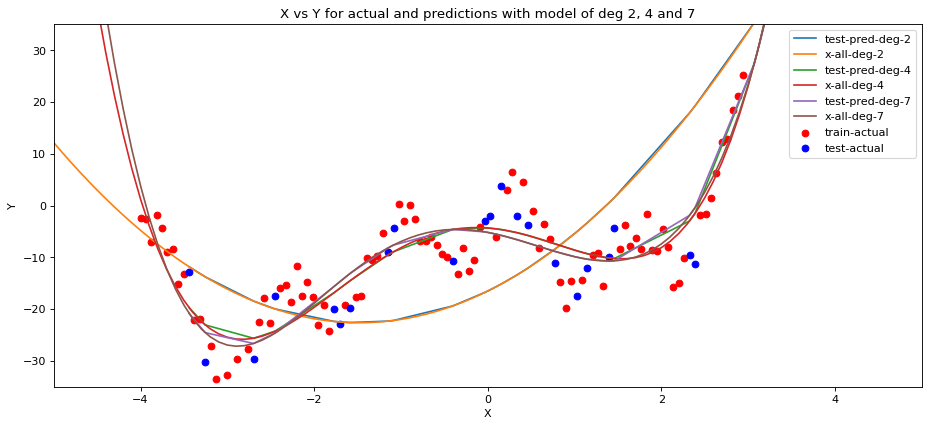

Train RMSES for degree 2, 4 and 7 are : [247.297, 31.72, 30.677]
Test RMSES for degree 2, 4 and 7 are : [320.064, 31.292, 33.411]


In [3]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test, x_all_plot=True)

20% data


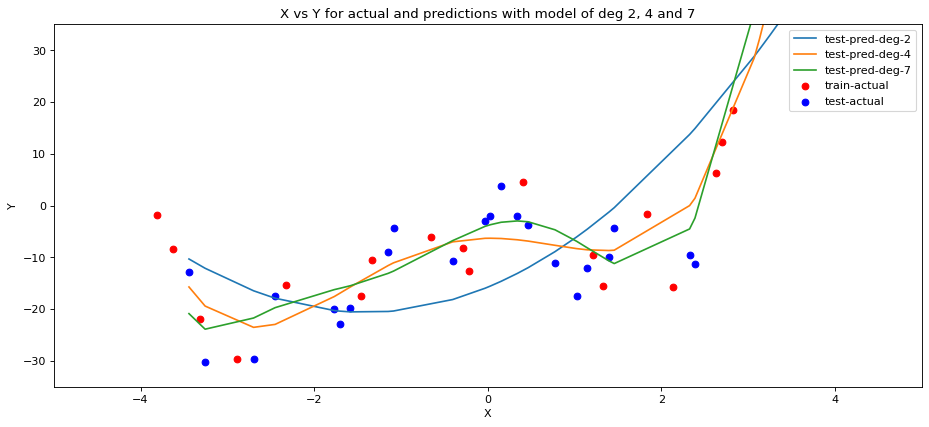

Train RMSES for degree 2, 4 and 7 are : [161.171, 35.115, 22.544]
Test RMSES for degree 2, 4 and 7 are : [402.323, 38.341, 135.208]
40% data


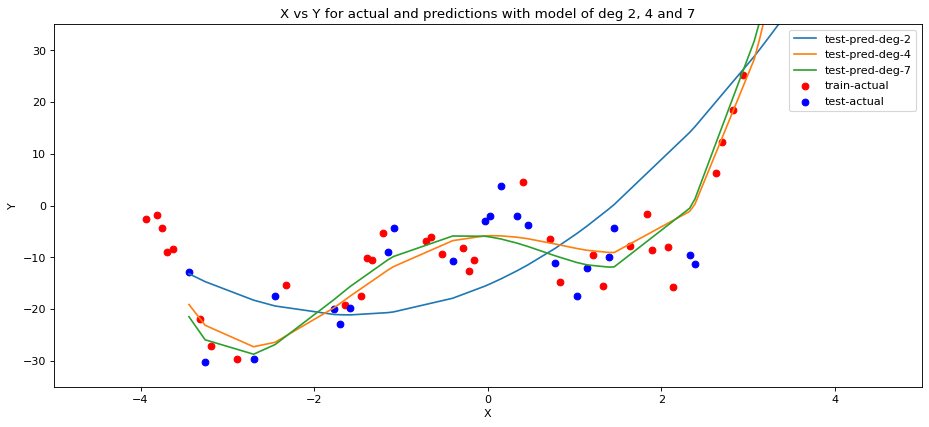

Train RMSES for degree 2, 4 and 7 are : [150.333, 31.625, 25.493]
Test RMSES for degree 2, 4 and 7 are : [405.805, 33.164, 61.237]
60% data


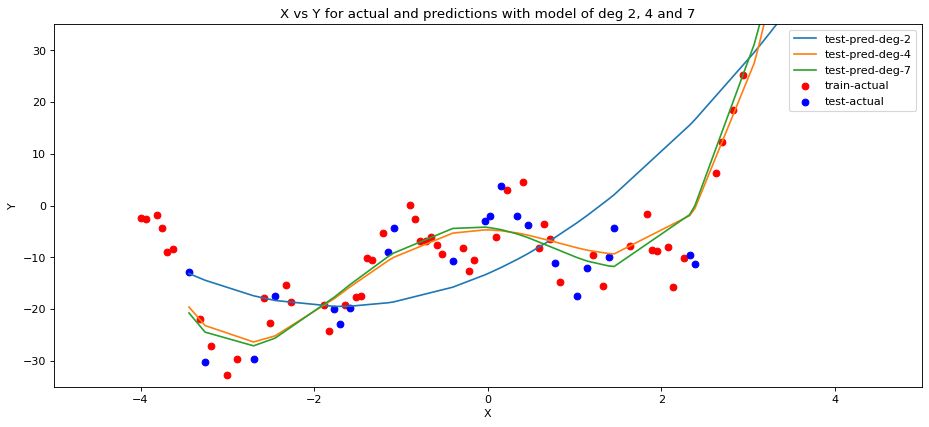

Train RMSES for degree 2, 4 and 7 are : [150.084, 29.193, 26.099]
Test RMSES for degree 2, 4 and 7 are : [403.251, 31.781, 60.167]
80% data


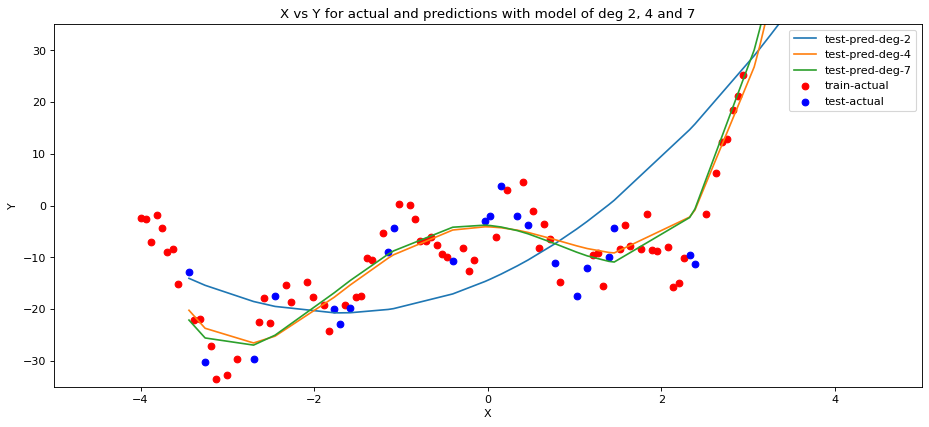

Train RMSES for degree 2, 4 and 7 are : [168.119, 29.305, 26.549]
Test RMSES for degree 2, 4 and 7 are : [407.594, 32.518, 48.077]
100% data


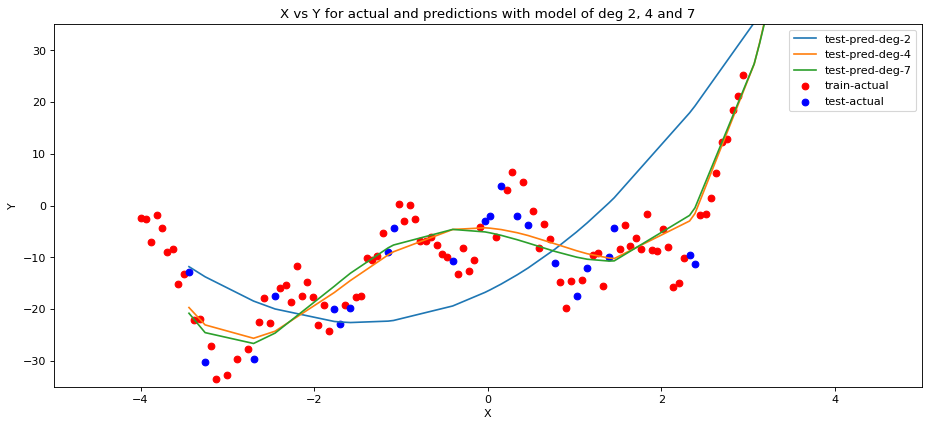

Train RMSES for degree 2, 4 and 7 are : [247.297, 31.72, 30.677]
Test RMSES for degree 2, 4 and 7 are : [320.064, 31.292, 33.411]


In [4]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

### Part b

Looking at the RMSE for the three models with three different polynomial degree, the second one, model with 4 polynomial degree works better. The model with 2 degree performs worse on both test and train data, looking at the actual y vs x plot we can say that it's a misses higher order polynomial trend in the data hence its a high bias model, on the other hand with 7 degrees RMSE is the best in the training set but worsens slightly for test data, as we are fitting higher degrees making it high variance. **The model with 4 degree works better for both train and test**, and has least differeces between the two RMSE model as it balances both bias and variance.

### Part c

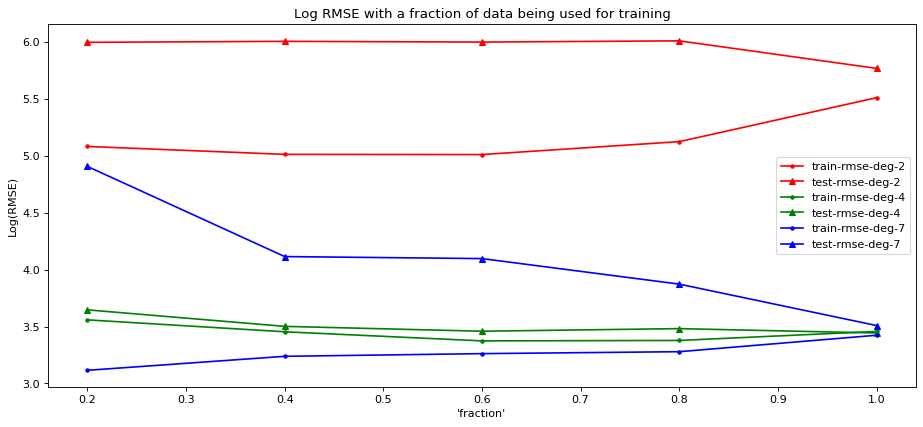

In [5]:
# creating df for plotting
rmse = pd.DataFrame(data=None, columns=['degree', 'fraction', 'train_rmse', 'test_rmse'])
fraction = np.array([0.2, 0.4, 0.6, 0.8, 1.])
deg = [2, 4, 7]
color = ['red', 'green', 'blue']
    
train_rmses = np.log(np.array([train_rmses_20, train_rmses_40, train_rmses_60, train_rmses_80, train_rmses_100]))
test_rmses = np.log(np.array([test_rmses_20, test_rmses_40, test_rmses_60, test_rmses_80, test_rmses_100]))

plt.figure(figsize=(14, 6), dpi=80)
for i in range(3):
    d = deg[i]
    # plotting
    plt.plot(fraction, train_rmses[:, i], label = 'train-rmse-deg-{}'.format(d), marker='.', color=color[i])
    plt.plot(fraction, test_rmses[:, i], label = 'test-rmse-deg-{}'.format(d), marker='^', color=color[i])

# adding plot attributes
plt.xlabel("'fraction'")
plt.ylabel("Log(RMSE)")
plt.title('Log RMSE with a fraction of data being used for training')
plt.legend()
plt.show()

Looking at the RMSEs plot of different polynomial models we can say that with 2 degree we get a high bias and low variance model, with 7 degree we get a low bias but high variance model. And model with degree 4 gives us moderate bias and variance, hence the model to choose for prediction. Increasing the data can only affect the variance of the model, as generalisation can happen more with more training data. However, since bias depend on the difference betweent the predicted model class and actual function, there won't be any change in accuracy if training data is increased. 

Since degree 7 polynomial is high in variance, adding more data reduces the Test RMSE significantly at each increment. For degree 2 polynomial, variance is already low hence adding more data didn't significantly improved the Test RMSE till the last point. For degree 4 polynomial, the model is already balance in bias and variance, hence increasing the data size is not having significant impact as seen for degree 7.

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:
a) The key difference between gradient descent and stochastic gradient descent is the number of data points used to calculate the loss and update the model weights. Gradient descent uses all the data point n, avaialble in the data set to do forward propogation - prediction and loss calculation, and backward propogation - model weights update. Since it uses complete data, *the gradient points directly in the direction of lower error contours* and convergence can happen in less number of steps. Though by its virtue of leveraging the complete dataset, for *highly large dataset the calculation takes significant computation time*. Stochastic gradient descent, on the other hand, uses one data point (or a fraction of the complete dataset) to compute the gradient. The gradient thus calculated is just an approximation of the true gradient, this makes *SGD updates the model at a faster rate but needs more iteration to converge* to the same point as traditional gradient descent. 

b) Nelder-Mead is a numerical technique to arrive at the minima without calculating graients, it considers n+1 points in an n-dimentional space and move one step from the point with the lowest function (error) value away for the point with highest function value. The step size is dynamic and the algorithm adjusts it based on the loss of the new point obtained. For a better (lower function value) point, the step size is higher compared to the new point which hasn't improved significantly over the previous loss values. Reducing the step size at iterations where the loss values haven't been decreasing much is indicative of the fact that the minima is nearer so one would want to slow down to avoid overshooting. For the points with more aggresive step sizes, the minima is farther so having a higher step size can help reach minima sooner. The main problem with Nelder-Mead is that they don't perform well with high dimensional functions. For 1 and 2 dimensional cases it is easier to figure out the direction to move, but the possible cases for movement increases significantly in an N dimensional space. Given that the complex machine learning problems have hundreds of parameters to say the least, Nelder-Mead might not be a good approach to use for optimizing the error functions.


# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:
Assumptions - 
* $y$ is the actual value from the dataset
* $\hat{y}$ is the predicted value based on the model defined
* $w^{(t)}$ is the vector of weights at any iteration *t*, $w^{(t)} = [w_0^{(t)}, w_1^{(t)}, w_2^{(t)}, w_3^{(t)}]$
* $\phi(x)$ is the vector of basis function based on input variables $x_1$ & $x_2$; $\phi(x) = [1, x_1, x_1x_2, e^{-x_1}]$ 
* $\phi(x_{i})$ is the basis function vector for data point $i, x_{1(i)}$ & $x_{2(i)}$; $\phi(x_{i}) = [1, x_{1(i)}, x_{1(i)}x_{2(i)}, e^{-x_{1(i)}}]$ 
* $\eta$ is the learning rate
* $i$ data point is being used to update the weights at $t+1$

Using the following formula for weights update in Stochastic gradient descent:

$$ w^{t+1} = w^{(t)} - \eta \nabla E_i^{(t)} $$ 

Taking partial derivative, $ \nabla E_i^{(t)} = - ( y_i - w^{(t)T}\phi(x_{i})) * \phi(x_{i}) $

Hence, 
$$ w^{t+1} = w^{(t)} + \eta  ( y_i - w^{(t)T}\phi(x_{i})) * \phi(x_{i}) $$

Expanding the above equation for $t$-th iteration for each weights gives the following - 

$$ [w_0^{(t+1)}, w_1^{(t+1)}, w_2^{(t+1)}, w_3^{(t+1)}] = 
[w_0^{(t)}, w_1^{(t)}, w_2^{(t)}, w_3^{(t)}] + \eta * (y - w_0^{(t)} - w_1^{(t)}x_{1(i)} - w_2^{(t)} x_{1(i)}x_{2(i)} - w_3^{(t)}e^{-x_{1(i)}}) * [1, x_{1(i)}, x_{1(i)}x_{2(i)}, e^{-x_{1(i)}}]$$

For each of the weights the update equation will look like below, $i$-th data point updating weights for $t$-th iteration

$$ w_0^{(t+1)} = w_0^{(t)}  + \eta * (y - w_0^{(t)} - w_1^{(t)}x_{1(i)} - w_2^{(t)} x_{1(i)}x_{2(i)} - w_3^{(t)}e^{-x_{1(i)}})  $$


$$ w_1^{(t+1)} = w_1^{(t)} +  x_{1(i)} * \eta * (y - w_0^{(t)} - w_1^{(t)}x_{1(i)} - w_2^{(t)} x_{1(i)}x_{2(i)} - w_3^{(t)}e^{-x_{1(i)}})  $$


$$ w_2^{(t+1)} = w_2^{(t)} +  x_{1(i)}x_{2(i)} * \eta * (y - w_0^{(t)} - w_1^{(t)}x_{1(i)} - w_2^{(t)} x_{1(i)}x_{2(i)} - w_3^{(t)}e^{-x_{1(i)}})  $$


$$ w_3^{(t+1)} = w_3^{(t)} +  e^{-x_{1(i)}} * \eta * (y - w_0^{(t)} - w_1^{(t)}x_{1(i)} - w_2^{(t)} x_{1(i)}x_{2(i)} - w_3^{(t)}e^{-x_{1(i)}})  $$

# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [6]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [7]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        # = please put your codes here to update the self.coef using SGD
        self.coef = self.coef - self.learning_rate * gradient
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                   #please put your codes here
                errors = y[i] - self.linearPredict(X[i, :])

                # Compute gradients
                    #please put your codes here
                gradient = - errors * X[i, :] + self.regularization * np.array(
                    [0, self.coef[1], self.coef[2], self.coef[3]])
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X
    
      return np.dot(X, self.coef) #this line is just a placeholder, please delete this line in your code        

In [8]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

## Answer:

### Part a

In [9]:
# creating data frame to store hyper parameters and rmse
from itertools import product
import warnings
warnings.simplefilter("ignore")
metric_param_df = pd.DataFrame(list(product(learning_rate, regularization, [n_epochs])))
metric_param_df.columns = ['learning_rate', 'regularization', 'n_epochs']

# looping over each hyper parameter
mses = []
for l_rate, reg, epoch in metric_param_df.values:
    # fitting the data using class
    # print(l_rate, reg, epoch)
    lr = Regression(learning_rate=l_rate, regularization=reg, n_epoch=int(epoch))
    lr.fit(X, y, plot=False)
    
    # train predictions
    y_pred = lr.linearPredict(lr.get_features(X))
    
    # mse
    mse = np.mean((y - y_pred)**2)
    mses.append(mse)
    
metric_param_df['mse'] = mses 

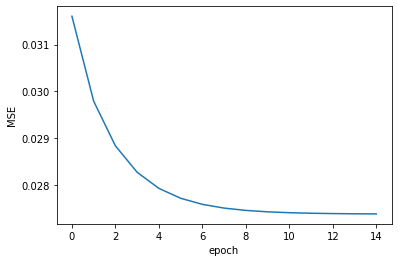

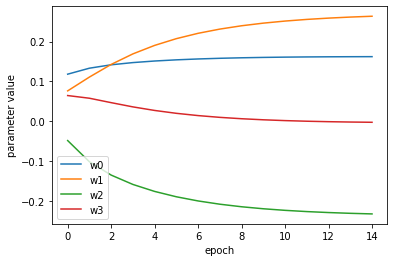

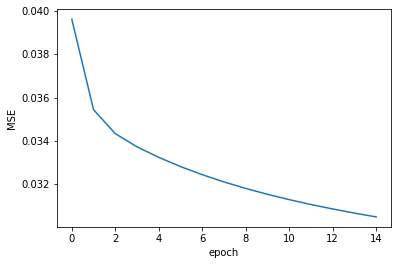

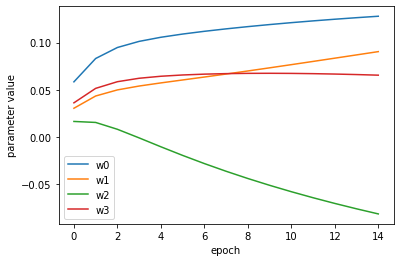

In [10]:
# getting 2 best model parameters
best_params = metric_param_df.sort_values('mse').head(2)

for l_rate, reg, _, _ in best_params.values:
    lr = Regression(learning_rate=l_rate, regularization=reg, n_epoch=int(epoch))
    lr.fit(X, y, plot=True)

### part b

In [11]:
best_params

,learning_rate,regularization,n_epochs,mse
6,0.010,0,15,0.027391
3,0.001,0,15,0.030496
